In [9]:
%matplotlib inline
import glob
import numpy as np
import pandas as pd
import timeit
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import os

data = pd.read_csv('Datasets/oasis_longitudinal.csv')
data = data.fillna(method='ffill')
data2= pd.read_csv('Datasets/oasis_cross-sectional.csv')
data2 = data2.fillna(method='ffill')

In [10]:
print(data.columns)
print(data.describe())

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')
            Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  373.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.455764   
std      0.922843   635.485118    7.640957    2.876339    1.134171   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  373.000000  373.000000   373.000000  373.000000  373.000000  
mean    27.335121    0.290885  1488.128686    0.729568    1.19546

In [11]:
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [12]:
data2.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,4.0,3.0,27.0,0.5,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,4.0,3.0,27.0,0.5,1737,0.848,1.010,NaN


In [13]:
print('DATA COLUMNS: \n', [col for col in data])

print('\nM/F: Gender',
     '\nAge: Age',
     '\nEDUC: Education Level',
     '\nSES: Socioeconomic Status',
     '\nMMSE: Mini Mental State Exam',
     '\nCDR: Clinical Dementia Rating',
     '\neTIV: Estimated Total Intracranial Volume',
     '\nnWBV: Normalize Whole Brain Volume',
     '\nASF: Atlas Scaling Factor')

features = ["M/F","Age","EDUC","SES","MMSE","eTIV","nWBV","ASF"]
x_data = pd.get_dummies(data[features])
y_data = data['CDR']

DATA COLUMNS: 
 ['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

M/F: Gender 
Age: Age 
EDUC: Education Level 
SES: Socioeconomic Status 
MMSE: Mini Mental State Exam 
CDR: Clinical Dementia Rating 
eTIV: Estimated Total Intracranial Volume 
nWBV: Normalize Whole Brain Volume 
ASF: Atlas Scaling Factor


In [14]:
plot_data = data[features + ['CDR']]
plot_data.head(5)

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,CDR
0,M,87,14,2.0,27.0,1987,0.696,0.883,0.0
1,M,88,14,2.0,30.0,2004,0.681,0.876,0.0
2,M,75,12,2.0,23.0,1678,0.736,1.046,0.5
3,M,76,12,2.0,28.0,1738,0.713,1.010,0.5
4,M,80,12,2.0,22.0,1698,0.701,1.034,0.5


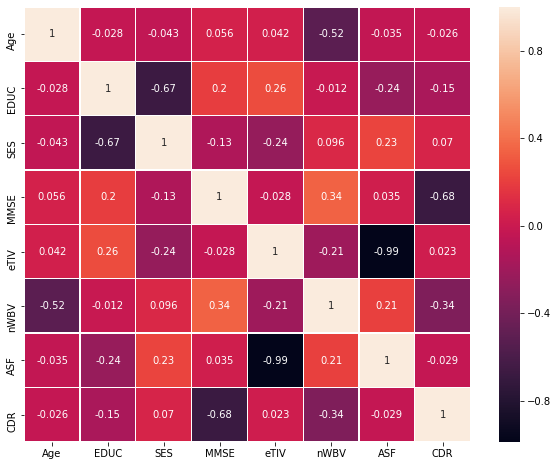

In [15]:
plt.figure(figsize=(10,8))

sns.heatmap(plot_data.corr(), annot=True, linewidth=.2)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
Subject ID    373 non-null object
MRI ID        373 non-null object
Group         373 non-null object
Visit         373 non-null int64
MR Delay      373 non-null int64
M/F           373 non-null object
Hand          373 non-null object
Age           373 non-null int64
EDUC          373 non-null int64
SES           373 non-null float64
MMSE          373 non-null float64
CDR           373 non-null float64
eTIV          373 non-null int64
nWBV          373 non-null float64
ASF           373 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
ID       436 non-null object
M/F      436 non-null object
Hand     436 non-null object
Age      436 non-null int64
Educ     436 non-null float64
SES      436 non-null float64
MMSE     436 non-null float64
CDR      436 non-null float64
eTIV     436 non-null int64
nWBV     436 non-null float64
ASF      436 non-null float64
Delay    20 non-null float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


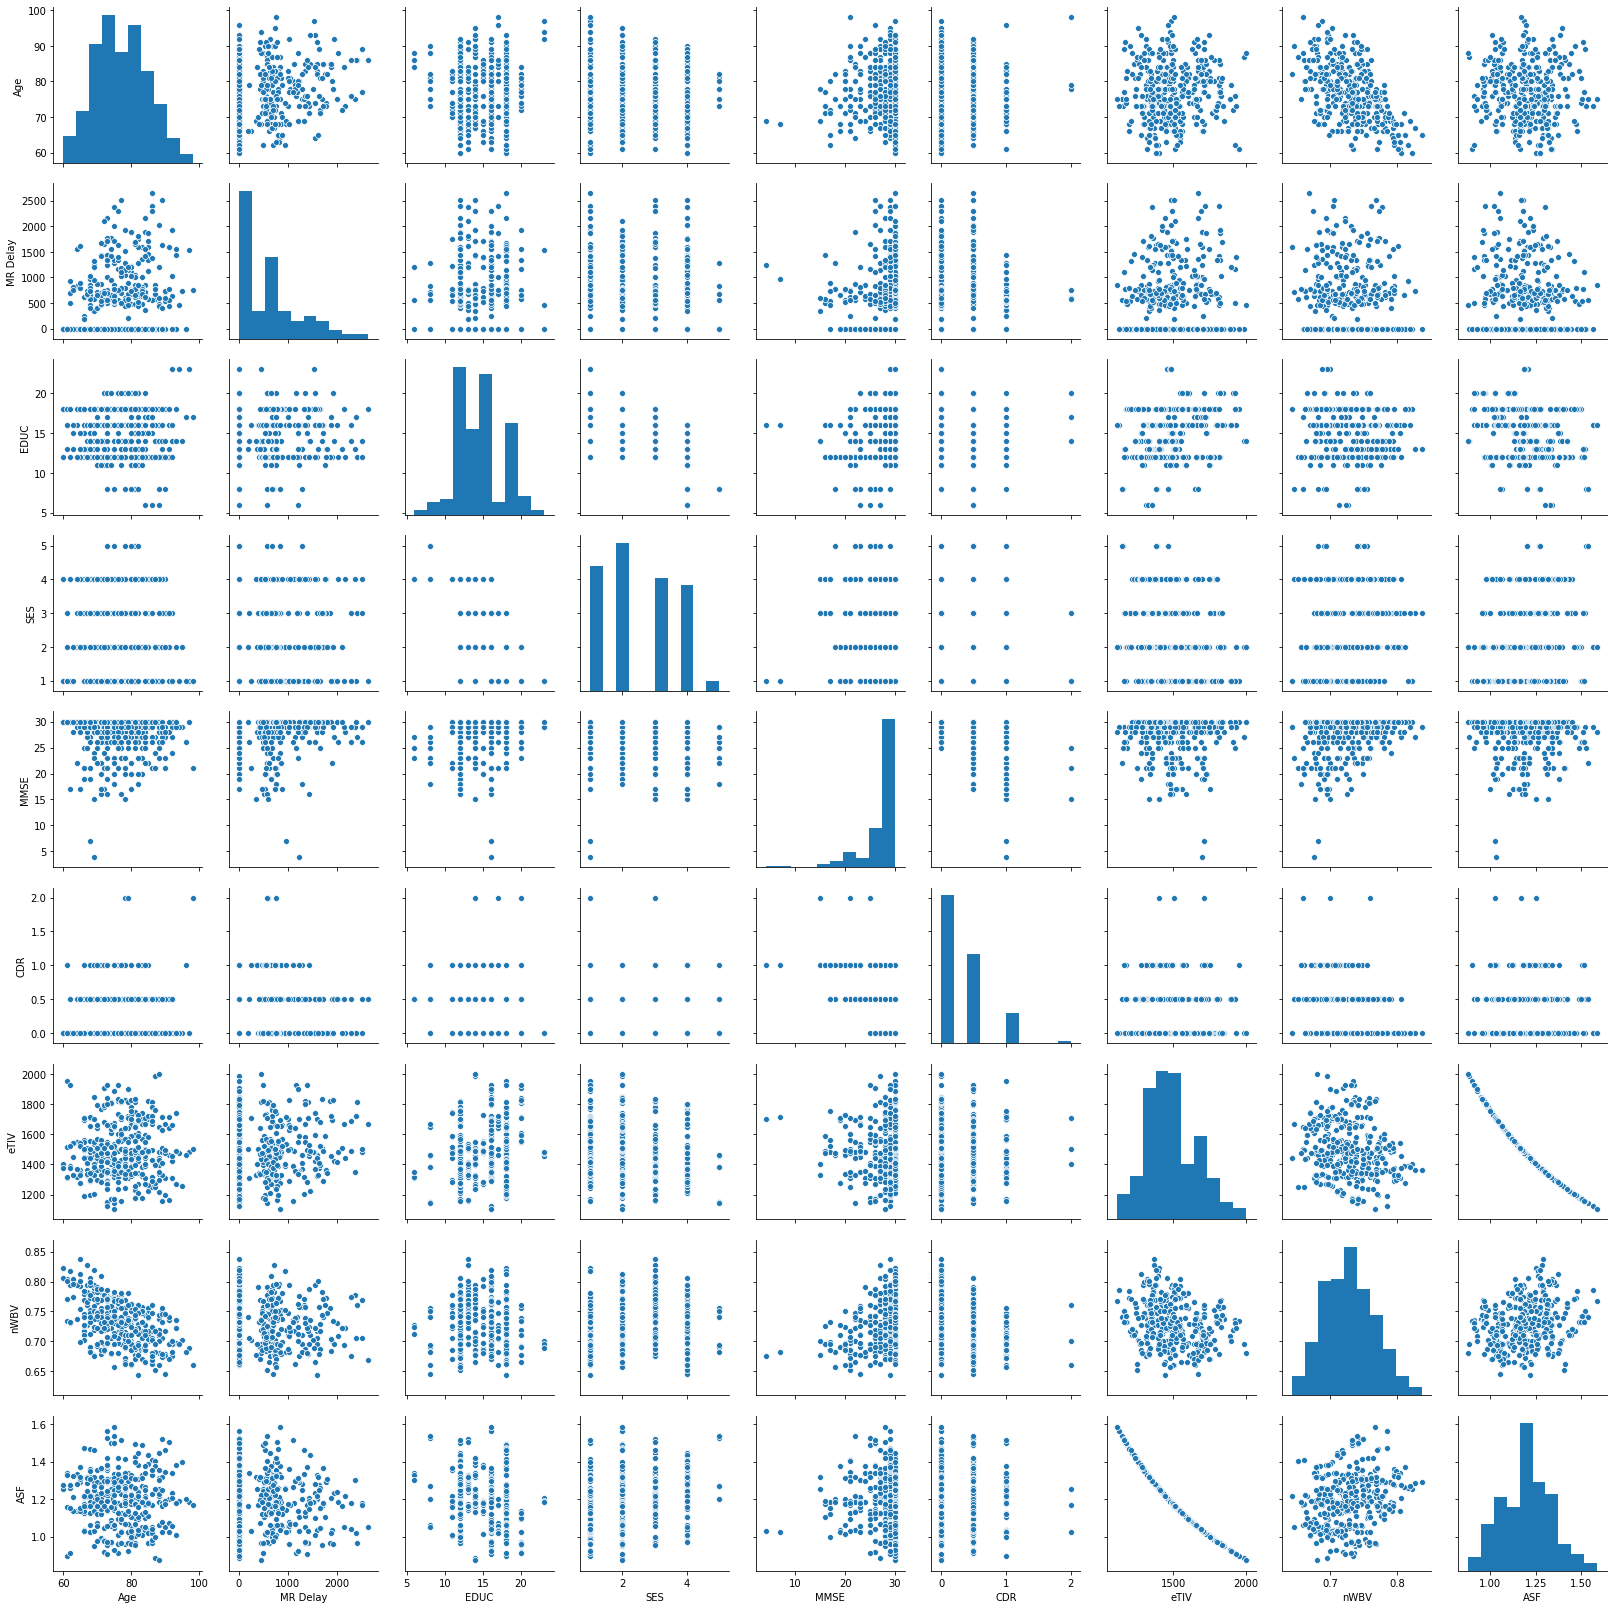

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
cols = ['Age','MR Delay', 'EDUC', 'SES', 'MMSE', 'CDR','eTIV','nWBV','ASF']
x=data.fillna('')
sns_plot = sns.pairplot(x[cols])

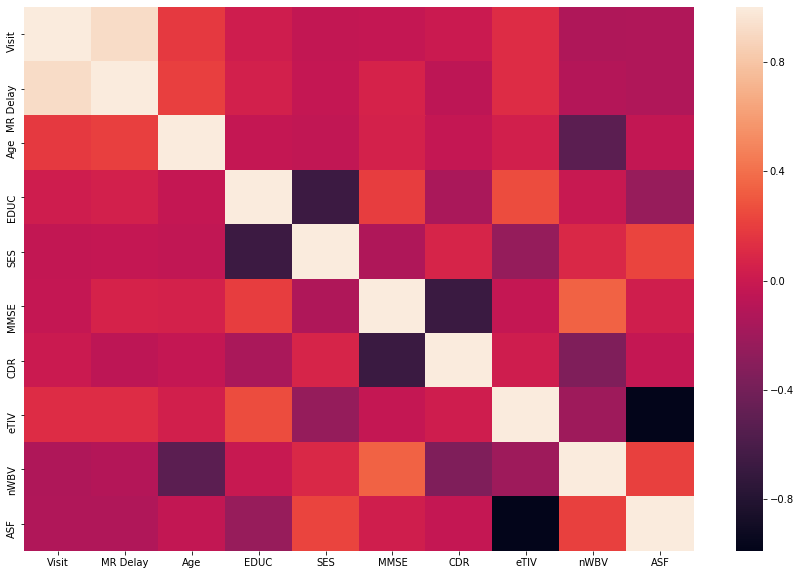

In [20]:
corr_matrix =data.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix)

In [21]:
data.drop(['MRI ID'], axis=1, inplace=True)
data.drop(['Visit'], axis=1, inplace=True)

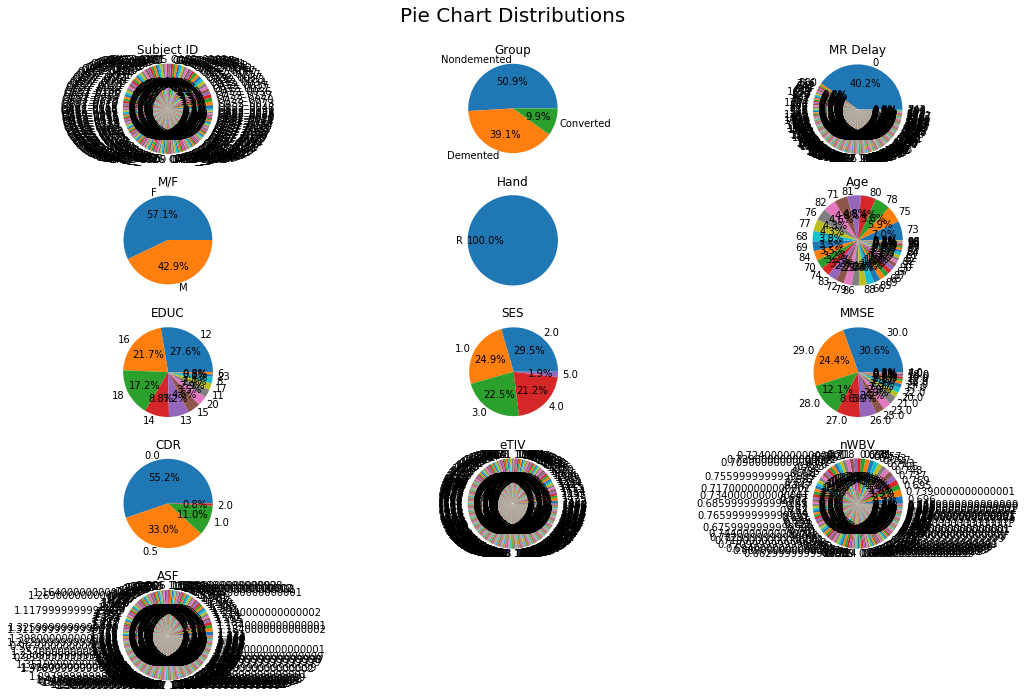

In [22]:
dataset=data
                        
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset.columns.values[i - 1])
   
    values = dataset.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.2, random_state=0)

In [24]:
etr = ExtraTreesRegressor(random_state=4, n_estimators=100, max_features='sqrt')

etr.fit(x_train, y_train)

pred = etr.predict(x_test)

print('Mean Absolute Error: ', round(mean_absolute_error(y_test, pred), 5))
print('Score: ', round(etr.score(x_test, y_test), 2) * 150, '%')

Mean Absolute Error:  0.16173
Score:  97.5 %
